# Central Limit Theorem

CLT states that the distribution of the sample means follow a Gaussian Distribution if the sample size is large enough.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from wand.image import Image
from wand.display import display
import seaborn as sns
#%matplotlib inline

## The Gaussian Distribution
AKA the normal distribution is the bell-shaped curve. The mean $\mu$ is the center of the Gaussian distribution and the variance $\sigma^2$ is a measure of dispersion about the mean. 

Let’s inspect the impact of changing its parameters, $\mu$ and $\sigma$, graphically:

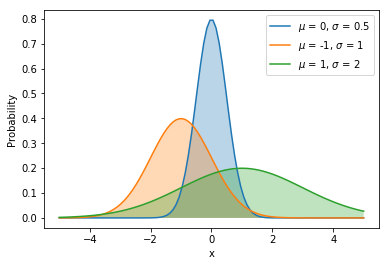

In [2]:
import numpy as np
from scipy.stats import norm
#generate list of data from -5 to 5
x = np.linspace(-5,5,100) 
for mean, std in zip([0,-1,1], [0.5,1,2]):
    #plot the normal PDF again x using various means and stds 
       plt.plot(x, norm(mean, std).pdf(x),label='$\mu$ = {}, $\sigma$ = {}'.format(mean, std))      
       plt.fill_between(x,norm(mean, std).pdf(x),alpha=0.3)
plt.legend()
plt.ylabel('Probability')
plt.xlabel('x')
plt.show()

Notice that as the standard deviation increases, the distribution becomes wider. This is important, since increasing the sample size of our sample mean distribution decreases the standard deviation, and as a result, creates a narrower distribution.

## Distribution of the Sample Mean

Imagine I were to flip a coin 100 times and asked you to guess how many heads showed up. Each coin flip represents an independent event and each flip follows the same distribution, the binomial distribution.

Since our coin flips are independent and identically distributed (IID), the CLT will take into effect.

Assuming the coin is fair, your best guess would (hopefully) be fifty heads if we were to toss it one hundred times. Now, let’s quantify our coin flips and say that a heads counts as a 1, whereas a tails counts as a 0. Thus, if we take the average of 50 heads and 50 tails, we would expect a sample mean of 0.5. Let’s simulate this running one thousand trials.

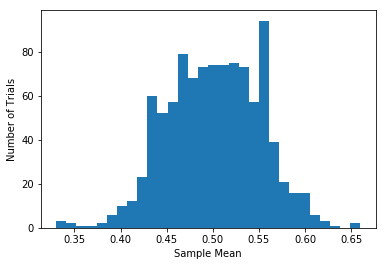

In [3]:
num_samples = 100
num_trials = 1000
results = np.random.choice([0,1], size=(num_trials, num_samples))
sample_means = np.mean(results, axis=1)
plt.hist(sample_means, bins=30)
plt.ylabel('Number of Trials')
plt.xlabel('Sample Mean')
plt.show()

As you can see, even with just 100 coin flips, the distribution of the sample means behaves like a Gaussian Distribution with the mean centered around our guess, 0.5.

## Variance And Sample Size

*The distribution of the sample means of can be approximated by a Gaussian distribution centered around the true mean ***regardless** of the underlying distribution of our sample.*

*except for the Cauchy Distribution

Let’s visualize the impact of our sample size on the spread of our sample mean distribution to gain a better understanding:

**Conditions for when the sample means of a binomial distribution can be approximated as Gaussian.**

$np \ge 5$ and $n(1-p) \ge 5$ 

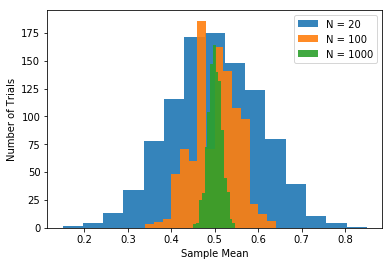

In [4]:
num_experiments = 1000
for num_samples in [20,100,1000]:
    results = np.random.choice([0,1], (num_experiments, num_samples))
    sample_means = np.mean(results, axis=1)
    plt.hist(sample_means, bins=15, alpha=0.9, label='N = {}'.format(num_samples))
plt.legend()
plt.ylabel('Number of Trials')
plt.xlabel('Sample Mean')
plt.show()

### Another example: Average of n die rolls

In [5]:
# 1000 simulations of die roll
n = 1000

# In each simulation, there is one trial more than the previous simulation
avg = []
for i in range(2,n):
    a = np.random.randint(1,7,i)
    avg.append(np.average(a))

In [6]:
# sample 10 expected value of die rolls
avg[1:10]

[4.0,
 3.75,
 4.0,
 3.3333333333333335,
 3.142857142857143,
 4.125,
 3.4444444444444446,
 3.7,
 3.1818181818181817]

In [7]:
# Function that will plot the histogram, where current is the latest figure
def clt(current):
    # if animation is at the last frame, stop it
    plt.cla()
    if current == 1000: 
        a.event_source.stop()

    plt.hist(avg[0:current])

    plt.gca().set_title('Expected value of die rolls')
    plt.gca().set_xlabel('Average from die roll')
    plt.gca().set_ylabel('Frequency')

    plt.annotate('Die roll = {}'.format(current), [3,27])

<IPython.core.display.Javascript object>


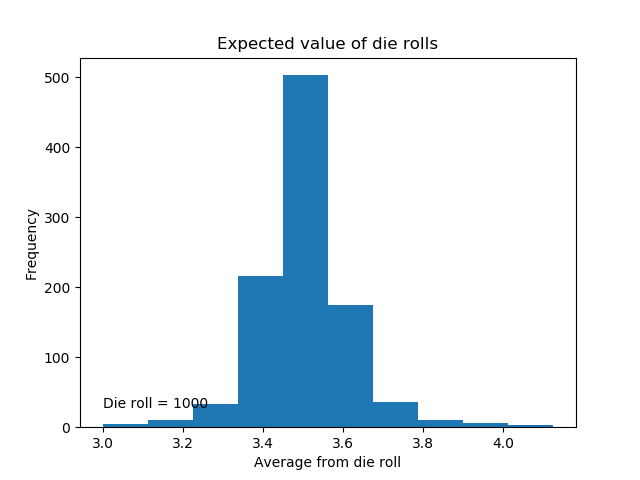

In [8]:
%matplotlib notebook
fig = plt.figure()
a = animation.FuncAnimation(fig, clt, interval=1)

In [9]:
a.save('images/clt.gif', writer='imagemagick', fps=10)